<a href="https://colab.research.google.com/github/gonzalezf333/final_IA_avances/blob/main/modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
link = 'drive/My Drive/IA_2022/datos_finales.csv'
datos = pd.read_csv(link)
datos.head()

,id_anony,Cod.Car.Sec,tardoCB,PasoCB,recursadas_s1,prom_al1,prom_c1,prom_dt,prom_f1,prom_ga,prom_gd,prom_1er_S
0,es_1815,MCT-PLS13,5,1,2,5.0,4.0,3.0,4.0,3.0,3.0,3.666667
1,es_1860,MCT-PLS13,5,1,1,2.5,2.0,3.0,4.0,3.0,5.0,3.142857
2,es_1948,MCT-PLS13,3,1,3,5.0,3.0,4.0,3.0,3.0,5.0,3.833333
3,es_1973,MCT-PLS13,5,1,0,3.0,3.0,3.0,3.0,5.0,5.0,3.666667
4,es_2008,MCT-PLS13,5,1,4,5.0,2.5,5.0,2.5,4.0,5.0,3.625000


In [4]:
np.unique(datos['tardoCB']) # 4 clases: tardo 2, 3, 4, 5 o mas años

array([2, 3, 4, 5])

In [5]:
def clasear(x):
    if x<5:
        return int(x-2)
    else:
        return 3

In [6]:
datos['tardoCB'] = datos['tardoCB'].apply(clasear)

In [7]:
np.unique(datos['tardoCB']) # 4 clases: 0 para 2 años, 1 para 3 años, 2 para 4 años, 3 para 5 años o mas

array([0, 1, 2, 3])

In [8]:
X = datos.drop(columns=['tardoCB','id_anony','PasoCB','Cod.Car.Sec'])
y = pd.DataFrame(datos['tardoCB'].values.astype(np.int64), columns=['tardoCB'])
X.shape, y.shape

((87, 8), (87, 1))

In [9]:
X = X.values.astype(float)
y = y.values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sn

In [12]:
y_cat = to_categorical(y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

In [29]:
model = Sequential()
model.add(Dense(8, activation='tanh' , input_shape=( X.shape[1], ), name = "Capa_de_Entrada"))
model.add(Dense(6, activation='tanh'   , name = "Capa_Oculta"))
model.add(Dense(4, activation='softmax', name = "Capa_de_Salida"))
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa_de_Entrada (Dense)     (None, 8)                 72        
                                                                 
 Capa_Oculta (Dense)         (None, 6)                 54        
                                                                 
 Capa_de_Salida (Dense)      (None, 4)                 28        
                                                                 
Total params: 154
Trainable params: 154
Non-trainable params: 0
_________________________________________________________________


Epoch 1/150
2/2 [==============================] - 0s 133ms/step - loss: 1.5304 - accuracy: 0.4516 - val_loss: 2.1436 - val_accuracy: 0.2857
Epoch 2/150
2/2 [==============================] - 0s 26ms/step - loss: 1.5166 - accuracy: 0.4516 - val_loss: 2.1129 - val_accuracy: 0.2857
Epoch 3/150
2/2 [==============================] - 0s 22ms/step - loss: 1.5055 - accuracy: 0.4516 - val_loss: 2.0817 - val_accuracy: 0.2857
Epoch 4/150
2/2 [==============================] - 0s 22ms/step - loss: 1.4966 - accuracy: 0.4516 - val_loss: 2.0506 - val_accuracy: 0.2857
Epoch 5/150
2/2 [==============================] - 0s 25ms/step - loss: 1.4839 - accuracy: 0.4516 - val_loss: 2.0204 - val_accuracy: 0.2857
Epoch 6/150
2/2 [==============================] - 0s 23ms/step - loss: 1.4711 - accuracy: 0.4516 - val_loss: 1.9909 - val_accuracy: 0.2857
Epoch 7/150
2/2 [==============================] - 0s 23ms/step - loss: 1.4620 - accuracy: 0.4516 - val_loss: 1.9604 - val_accuracy: 0.2857
Epoch 8/150
2/2 [==

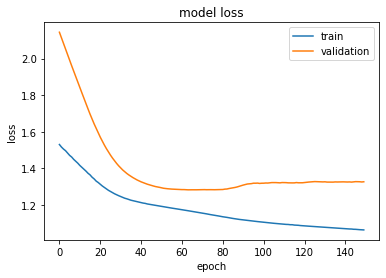

In [30]:
# Train the model
history = model.fit(X_train, y_train, epochs=150, verbose=1, validation_split=0.1)
model.summary()
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [31]:
# Evaluamos el modelo con métricas
from sklearn import metrics

loss, acc = model.evaluate(X, y_cat)
print("Precisión: ",acc,"\n Valores de pérdida:",loss)

3/3 [==============================] - 0s 3ms/step - loss: 1.0871 - accuracy: 0.5632
Precisión:  0.5632184147834778 
 Valores de pérdida: 1.0870996713638306


In [32]:
predictions = model.predict(X_test)

1/1 - 0s - loss: 1.0759 - accuracy: 0.6667 - 19ms/epoch - 19ms/step


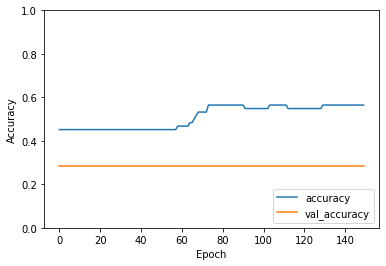

In [33]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [34]:
print('test_acc:  ', test_acc*100)
print('test_loss: ', test_loss)

test_acc:   66.66666865348816
test_loss:  1.0759083032608032


In [41]:
from sklearn.metrics import confusion_matrix, precision_score, f1_score

In [36]:
y_test_label = np.argmax(y_test,axis=1) 
y_pred_label = np.argmax(predictions,axis=1)

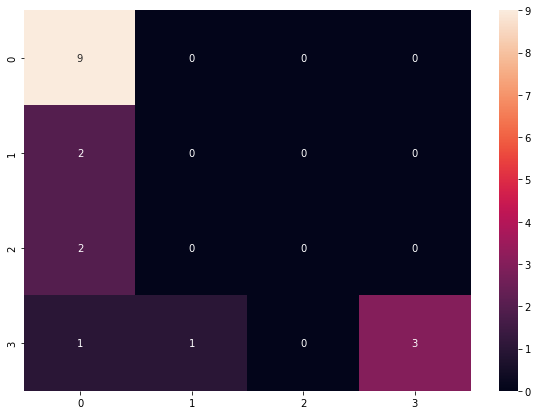

In [37]:
cm = confusion_matrix(y_test_label, y_pred_label)
df_cm = pd.DataFrame(cm, index = [i for i in range(0,4)], columns = [i for i in range(0,4)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.show()

In [23]:
precision_score(y_pred_label, y_test_label, average='macro')

0.25

In [40]:
f1_score(y_pred_label, y_test_label,  average='macro')

0.38315217391304346